In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss

In [185]:
df = pd.read_csv('logi.csv')
df

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242070,1
9,7.673756,3.508563,1


# Q1

In [194]:
x1 = df['X1']
x2 = df['X2']
y = df['Y']

x1 = (x1 - x1.min())/(x1.max() - x1.min())
x2 = (x2 - x2.min())/(x2.max() - x2.min())

In [203]:
def s(x):
    return 1/(1+np.exp(-x))

b0 = 0.0
b1 = 0.0
b2 = 0.0
alpha = 0.01

b0s, b1s, b2s, errs, acc_list = [], [], [], [], []

for i in range(100):
    for x1_, x2_, y_ in zip(x1, x2, y):
        z = b0 + b1*x1_ + b2*x2_
        pred = s(z)
    
        err = pred - y_
    
        b0 -= alpha*err
        b1 -= alpha*err*x1_
        b2 -= alpha*err*x2_
        
        b0s.append(b0)
        b1s.append(b1)
        b2s.append(b2)
        errs.append(err)
        
        print(f'epoch: {i}, B0: {b0: .2f}, B1: {b1: .2f}, B2: {b2: .2f}, err: {err: .2f}')
        
    if i < 5:
        acc_list.append(accuracy_score(y, [round(s(b0 + b1*x1_ +b2*x2_)) for x1_, x2_ in zip(x1, x2)]))
        
        
print(f'B0: {b0: .2f}, B1: {b1: .2f}, B2: {b2: .2f}')

epoch: 0, B0: -0.01, B1: -0.00, B2: -0.00, err:  0.50
epoch: 0, B0: -0.01, B1: -0.00, B2: -0.01, err:  0.50
epoch: 0, B0: -0.01, B1: -0.00, B2: -0.01, err:  0.50
epoch: 0, B0: -0.02, B1: -0.00, B2: -0.01, err:  0.50
epoch: 0, B0: -0.02, B1: -0.00, B2: -0.02, err:  0.49
epoch: 0, B0: -0.02, B1:  0.00, B2: -0.01, err: -0.51
epoch: 0, B0: -0.01, B1:  0.00, B2: -0.01, err: -0.51
epoch: 0, B0: -0.01, B1:  0.01, B2: -0.01, err: -0.50
epoch: 0, B0: -0.00, B1:  0.01, B2: -0.01, err: -0.50
epoch: 0, B0:  0.00, B1:  0.02, B2: -0.00, err: -0.50
epoch: 1, B0: -0.00, B1:  0.02, B2: -0.01, err:  0.50
epoch: 1, B0: -0.01, B1:  0.02, B2: -0.01, err:  0.50
epoch: 1, B0: -0.01, B1:  0.01, B2: -0.02, err:  0.50
epoch: 1, B0: -0.02, B1:  0.01, B2: -0.02, err:  0.49
epoch: 1, B0: -0.02, B1:  0.01, B2: -0.02, err:  0.49
epoch: 1, B0: -0.02, B1:  0.02, B2: -0.02, err: -0.51
epoch: 1, B0: -0.01, B1:  0.02, B2: -0.02, err: -0.50
epoch: 1, B0: -0.01, B1:  0.02, B2: -0.01, err: -0.50
epoch: 1, B0: -0.00, B1:  0.

In [196]:
pred =[round(s(b0 + b1*x1_ +b2*x2_)) for x1_, x2_ in zip(x1, x2)]

In [197]:
cm = confusion_matrix(y, pred)
acc_sc = accuracy_score(y, pred)

print(cm)
print(f'Acc Score: {acc_sc}')

[[5 0]
 [0 5]]
Acc Score: 1.0


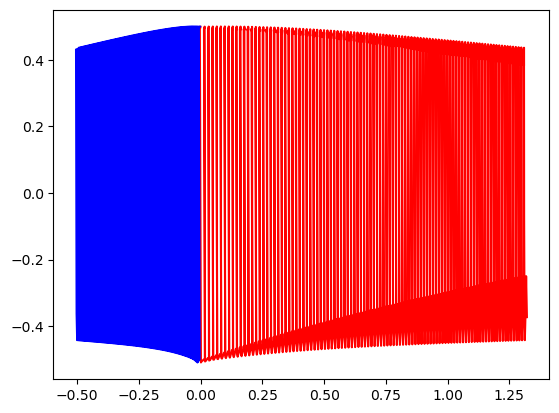

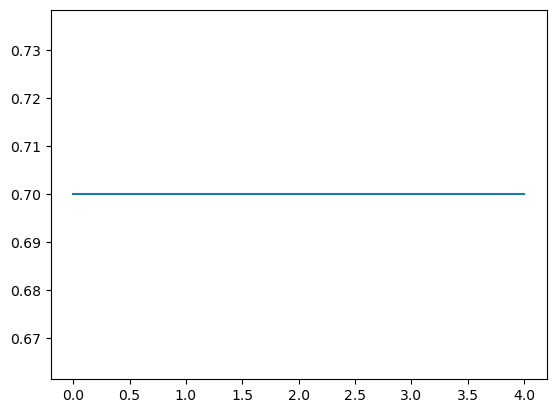

In [204]:
plt.plot(b1s, errs, color='r')
plt.plot(b2s, errs, color='b')
plt.show()

plt.plot(range(5), acc_list)

In [199]:
logi = LogisticRegression()
logi.fit(df[['X1', 'X2']], y)

print(*logi.coef_, logi.intercept_, logi.score(df[['X1', 'X2']], y))

[ 1.18383416 -0.35803503] [-4.55163352] 1.0


# Q2

In [200]:
b0 = 0.0
b1 = 0.0
alpha = 0.01

b1s, errs = [], []

for i in range(1000):
    for x_, y_ in zip(x1,y):
        z = b0 + b1*x_
        pred = s(z)
    
        err = pred - y_
    
        b0 -= alpha*err
        b1 -= alpha*err*x_
        
        b1s.append(b1)
        errs.append(err)
        
        print(f'epoch: {i}, B0: {b0: .2f}, B1: {b1: .2f}, err: {err: .2f}')
        
preds = [s(b0 + b1*x_) for x_ in x1]        
ll0, ll1, x_0, x_1 = [], [], [], []

for p, x in zip(preds, x1):
    if p < 0.5:
        x_0.append(x)
        ll0.append(-np.log(1-p))
    else:
        x_1.append(x)
        ll1.append(-np.log(p))
        
print(f'B0: {b0}, B1: {b1}')

epoch: 0, B0: -0.01, B1: -0.00, err:  0.50
epoch: 0, B0: -0.01, B1: -0.00, err:  0.50
epoch: 0, B0: -0.01, B1: -0.00, err:  0.50
epoch: 0, B0: -0.02, B1: -0.00, err:  0.50
epoch: 0, B0: -0.02, B1: -0.00, err:  0.49
epoch: 0, B0: -0.02, B1:  0.00, err: -0.51
epoch: 0, B0: -0.01, B1:  0.00, err: -0.50
epoch: 0, B0: -0.01, B1:  0.01, err: -0.50
epoch: 0, B0: -0.00, B1:  0.01, err: -0.50
epoch: 0, B0:  0.00, B1:  0.02, err: -0.50
epoch: 1, B0: -0.00, B1:  0.02, err:  0.50
epoch: 1, B0: -0.01, B1:  0.02, err:  0.50
epoch: 1, B0: -0.01, B1:  0.01, err:  0.50
epoch: 1, B0: -0.02, B1:  0.01, err:  0.50
epoch: 1, B0: -0.02, B1:  0.01, err:  0.50
epoch: 1, B0: -0.02, B1:  0.02, err: -0.50
epoch: 1, B0: -0.01, B1:  0.02, err: -0.50
epoch: 1, B0: -0.01, B1:  0.02, err: -0.50
epoch: 1, B0: -0.00, B1:  0.03, err: -0.50
epoch: 1, B0:  0.00, B1:  0.03, err: -0.49
epoch: 2, B0: -0.00, B1:  0.03, err:  0.50
epoch: 2, B0: -0.01, B1:  0.03, err:  0.50
epoch: 2, B0: -0.01, B1:  0.03, err:  0.50
epoch: 2, B

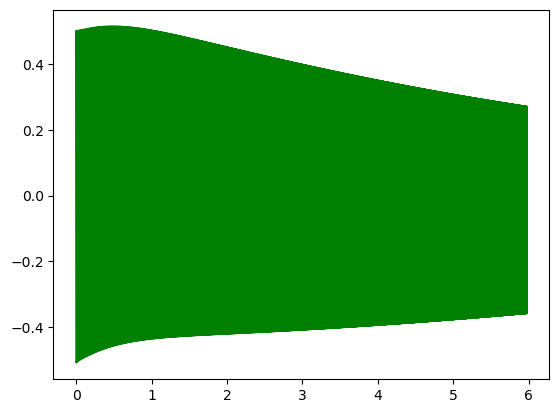

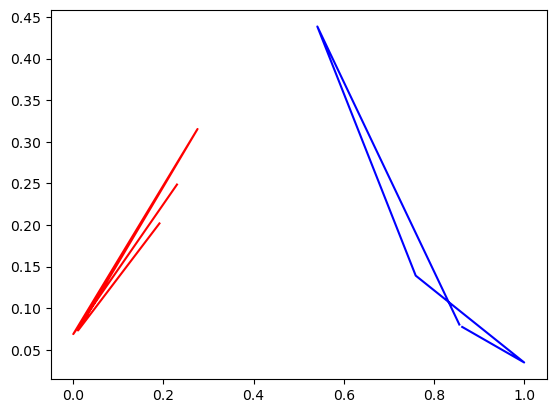

In [201]:
plt.plot(b1s, errs, color='g')
plt.show()

plt.plot(x_0, ll0, color='r')
plt.plot(x_1, ll1, color='b')